In [3]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
%load_ext autoreload
%autoreload 2
from util import split_agents, compute_pairwise_distance


In [4]:
from casadi import Opti


In [5]:
import util
from matplotlib.font_manager import FontProperties
font_path = '/usr/share/fonts/truetype/palatino/Palatino Normal.ttf'
# Create FontProperties object with the specified font file
font_prop = FontProperties(fname=font_path)

#### 3-D trajectory simulation

In [445]:
trajectory_data = np.load("admm_consensus_BVC_convex_5.npz")
# trajectory_data = np.load("admm_consensus_BVC_nonconvex_3.npz")

In [446]:
X_full = trajectory_data['X_full']
xr = trajectory_data['xr']
x0 = trajectory_data['x0']
obj_trj = trajectory_data['obj_trj']
obj_hist = trajectory_data['obj_hist']

In [447]:
xr.T

array([[0.2636073 , 3.17721493, 0.49654466, 0.        , 0.        ,
        0.        , 1.00960496, 1.11177116, 0.57830948, 0.        ,
        0.        , 0.        , 2.40155553, 2.89301652, 0.61262375,
        0.        , 0.        , 0.        , 0.93215063, 2.88517535,
        2.18890247, 0.        , 0.        , 0.        , 3.11818229,
        2.22047562, 1.71776576, 0.        , 0.        , 0.        ]])

In [448]:
x0.T

array([[2.03844638, 0.35517752, 1.96443661, 0.        , 0.        ,
        0.        , 2.84008177, 2.32975842, 1.84023766, 0.        ,
        0.        , 0.        , 1.95205063, 2.08537968, 2.19789589,
        0.        , 0.        , 0.        , 1.53364558, 1.24311623,
        0.13035766, 0.        , 0.        , 0.        , 0.33619289,
        1.35049904, 1.1131121 , 0.        , 0.        , 0.        ]])

Text(0, 0.5, 'Cost to go')

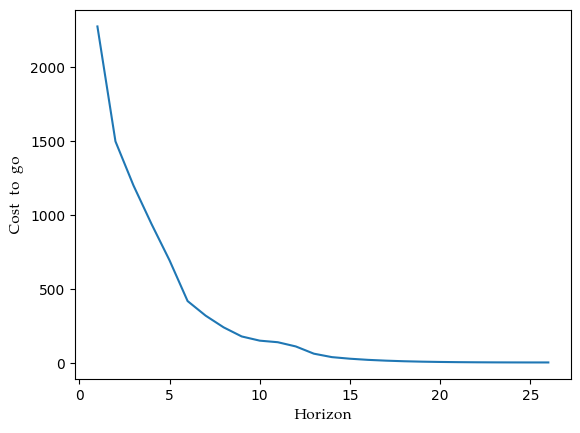

In [449]:
plt.figure(dpi=100)
plt.plot(obj_hist)
plt.xlabel('Horizon',fontproperties=font_prop,fontsize=13)
plt.ylabel('Cost to go',fontproperties=font_prop,fontsize=13)
# plt.savefig('figures/3_drones_convex(cost)')

In [450]:
xr.T

array([[0.2636073 , 3.17721493, 0.49654466, 0.        , 0.        ,
        0.        , 1.00960496, 1.11177116, 0.57830948, 0.        ,
        0.        , 0.        , 2.40155553, 2.89301652, 0.61262375,
        0.        , 0.        , 0.        , 0.93215063, 2.88517535,
        2.18890247, 0.        , 0.        , 0.        , 3.11818229,
        2.22047562, 1.71776576, 0.        , 0.        , 0.        ]])

In [451]:
util.distance_to_goal(X_full[-1].flatten(), xr.flatten(),5, 6)

array([0.20365862, 0.13651534, 0.22443845, 0.15125481, 0.10125655])

In [452]:
x_dims = [6]*5

In [453]:
X_full.shape

(27, 30)

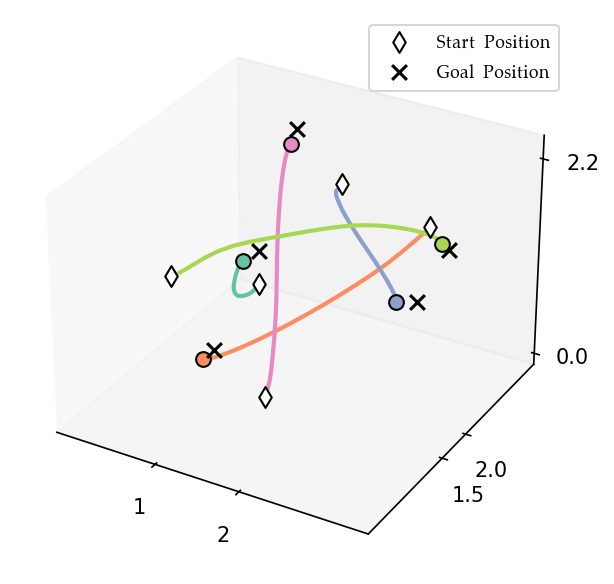

In [455]:
plt.figure(dpi=150)
util.plot_solve(X_full, float(obj_trj), xr, x_dims, True, 3)
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"],prop=font_prop)
plt.gca().set_xticks([1,2.0])
plt.gca().set_yticks([1.5,2.0])
plt.gca().set_zticks([0,2.2])
plt.gca().grid('')
plt.title("");

# plt.gca().view_init(elev=90, azim=0)
# plt.gca().set_zticks([])
plt.savefig('figures/BVC_5_drones_convex', bbox_inches='tight', dpi=200)
# plt.show()

In [430]:
compute_pairwise_distance(X_full,x_dims).min(),compute_pairwise_distance(X_full,x_dims).max()

(0.20395588842041856, 2.0024984394500787)

In [431]:
compute_pairwise_distance(X_full,x_dims).shape

(26, 3)

In [402]:
r_min= 2*0.3

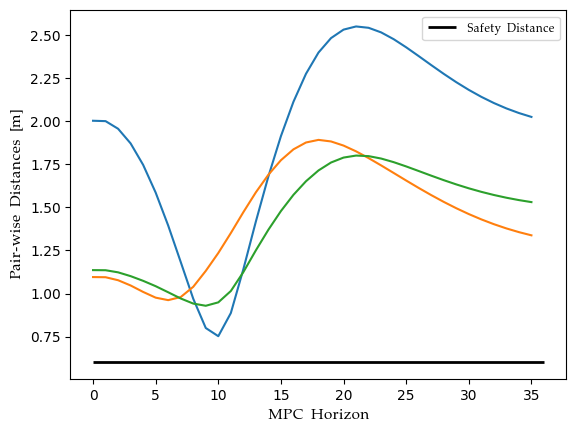

In [406]:
plt.figure(dpi=100)
plt.plot(compute_pairwise_distance(X_full,x_dims),label='')
plt.hlines(r_min, 0, X_full.shape[0] ,color='k',linewidth=2)
plt.ylabel('Pair-wise Distances [m]',fontproperties=font_prop,fontsize=13)
plt.xlabel('MPC Horizon',fontproperties=font_prop,fontsize=13)
# plt.legend(['safety distance'],loc = 'upper right', prop = font_prop, fontsize=14)
# plt.gca().legend(['safety distance'],loc = 'upper right', prop = font_prop, fontsize=14)
plt.legend(plt.gca().get_children()[3:4],['Safety Distance'],loc = 'upper right', prop = font_prop, fontsize=14)
plt.savefig('figures/3_drones_pairwise_distances(convex).png',dpi=200)